<a href="https://colab.research.google.com/github/chaitalisaha06/CSI_Assignments/blob/main/Customer_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as py
from sklearn.cluster import KMeans
import warnings
import os
warnings.filterwarnings("ignore")


In [56]:
df= pd.read_csv('/content/drive/MyDrive/Mall_Customers.csv')
df.head(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [58]:
#total rows and colums in the dataset
df.shape

(200, 5)

In [60]:
#Missing values computation
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

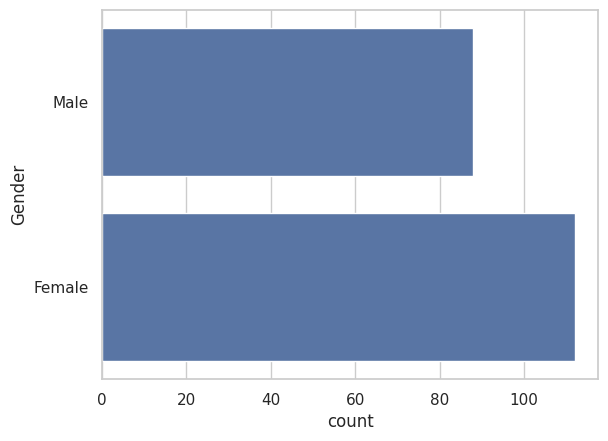

In [61]:
plt.figsize = (15 , 5)
sns.countplot(y = 'Gender' , data = df)
plt.show()

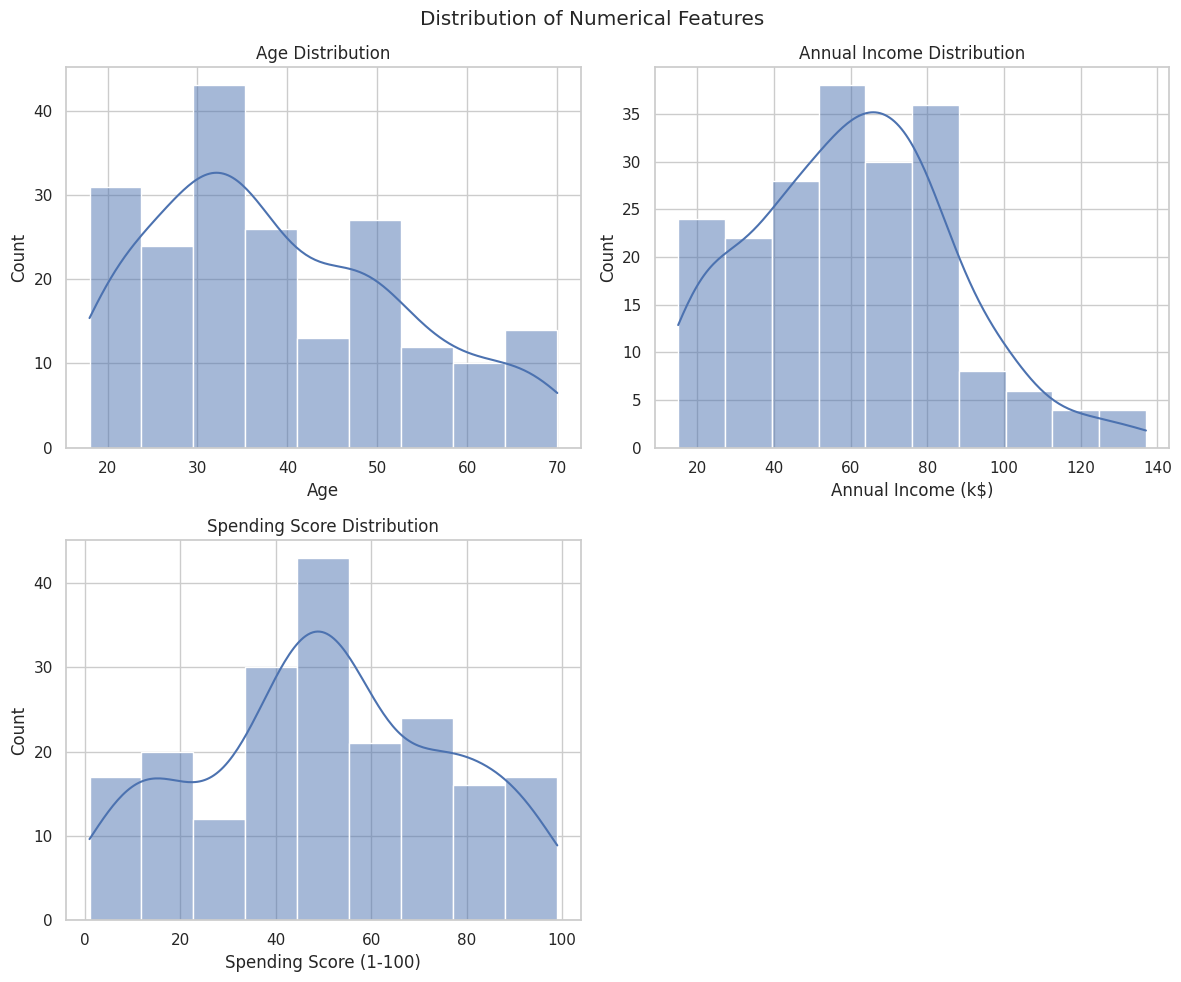

In [62]:
# Set the style for the plots
sns.set(style="whitegrid")

# Plot histograms for each numerical feature
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
fig.suptitle('Distribution of Numerical Features')

sns.histplot(df['Age'], kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Age Distribution')

sns.histplot(df['Annual Income (k$)'], kde=True, ax=axes[0, 1])
axes[0, 1].set_title('Annual Income Distribution')

sns.histplot(df['Spending Score (1-100)'], kde=True, ax=axes[1, 0])
axes[1, 0].set_title('Spending Score Distribution')

# Hide the last subplot (unused)
axes[1, 1].axis('off')

plt.tight_layout()
plt.show()

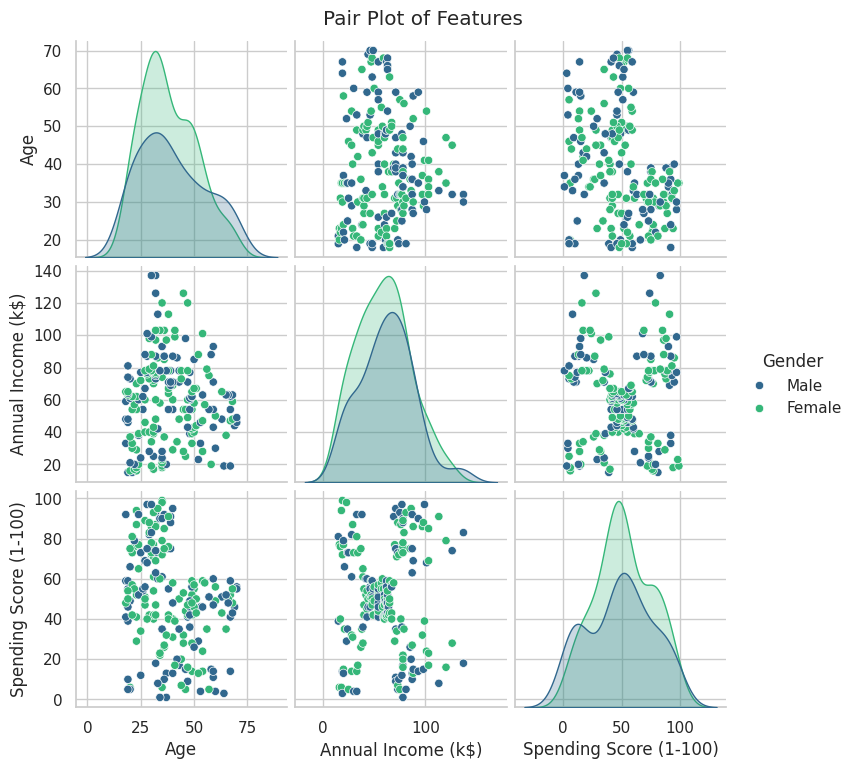

In [63]:
# Pair plot to visualize relationships between features
sns.pairplot(df.drop('CustomerID', axis=1), hue='Gender', palette='viridis')
plt.suptitle('Pair Plot of Features', y=1.02)
plt.show()

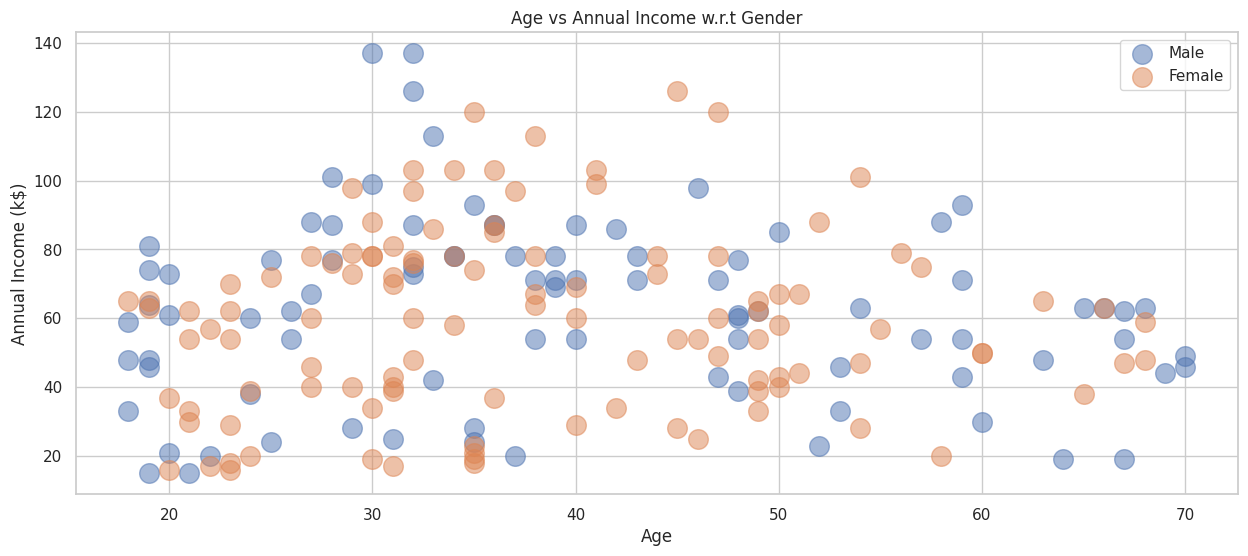

In [64]:
plt.figure(1 , figsize = (15 , 6))
for gender in ['Male' , 'Female']:
    plt.scatter(x = 'Age' , y = 'Annual Income (k$)' , data = df[df['Gender'] == gender] ,
                s = 200 , alpha = 0.5 , label = gender)
plt.xlabel('Age'), plt.ylabel('Annual Income (k$)')
plt.title('Age vs Annual Income w.r.t Gender')
plt.legend()
plt.show()


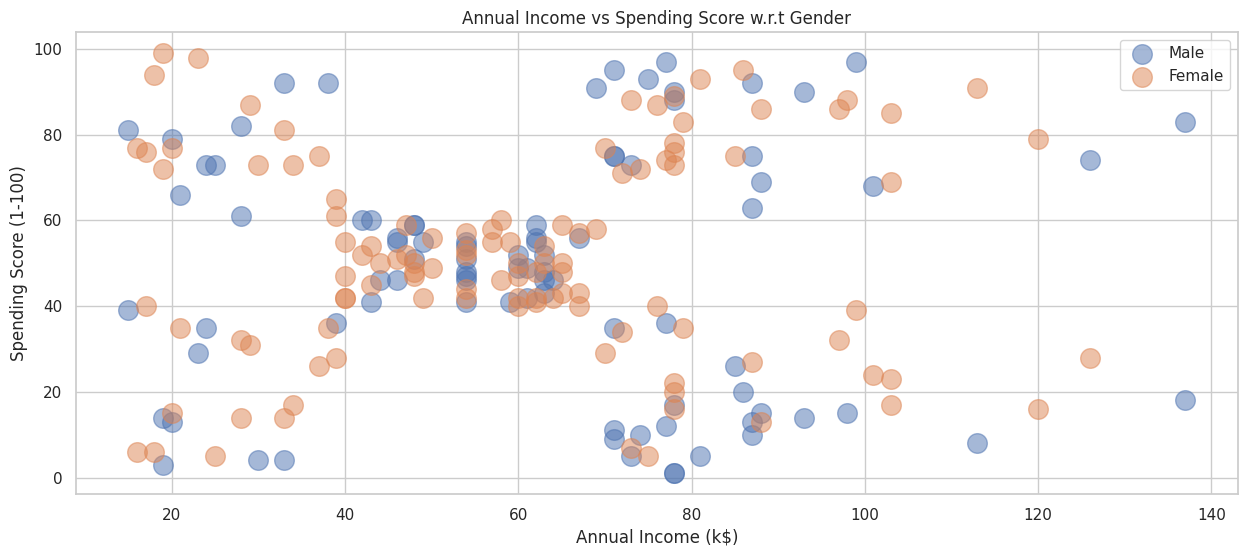

In [65]:
plt.figure(1 , figsize = (15 , 6))
for gender in ['Male' , 'Female']:
    plt.scatter(x = 'Annual Income (k$)',y = 'Spending Score (1-100)' ,
                data = df[df['Gender'] == gender] ,s = 200 , alpha = 0.5 , label = gender)
plt.xlabel('Annual Income (k$)'), plt.ylabel('Spending Score (1-100)')
plt.title('Annual Income vs Spending Score w.r.t Gender')
plt.legend()
plt.show()

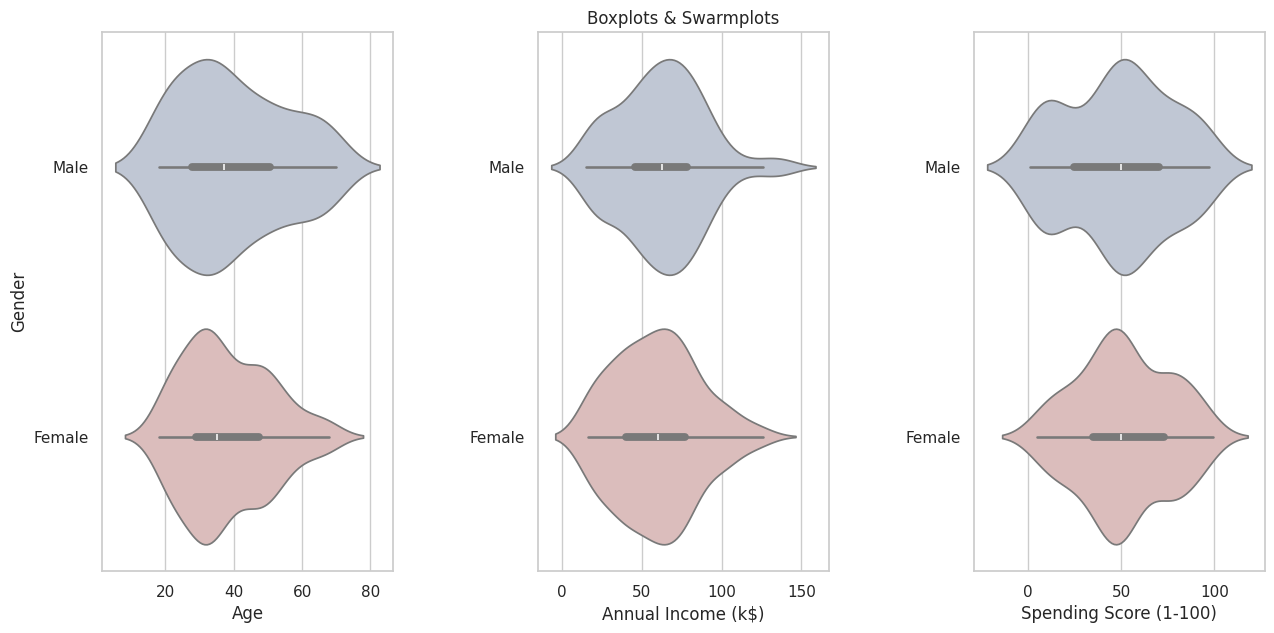

In [66]:
plt.figure(1 , figsize = (15 , 7))
n = 0
for cols in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
    n += 1
    plt.subplot(1 , 3 , n)
    plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
    sns.violinplot(x = cols , y = 'Gender' , data = df , palette = 'vlag')
    plt.ylabel('Gender' if n == 1 else '')
    plt.title('Boxplots & Swarmplots' if n == 2 else '')
plt.show()

In [67]:
df.rename(index=str, columns={'Annual Income (k$)': 'Annual Income',
                              'Spending Score (1-100)': 'Spending Score'}, inplace=True)


In [68]:
# Binary encoding
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})

<Axes: >

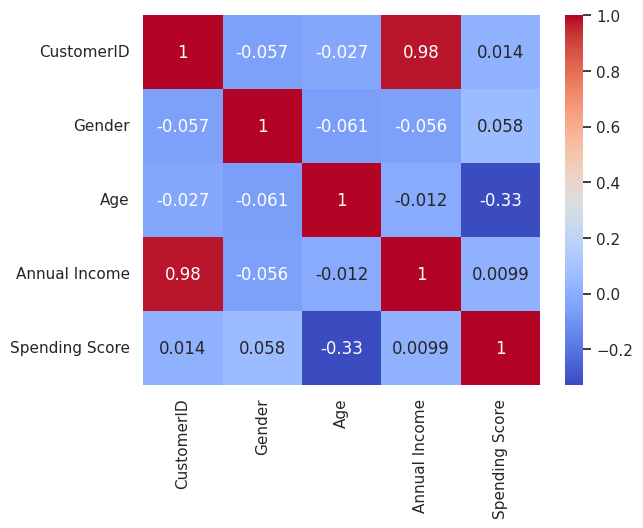

In [69]:
corr = df.corr()
sns.heatmap(corr , annot = True , cmap = 'coolwarm')

## Clustering using K- means

1.Segmentation using Age and Spending Score

In [70]:
X1 = df[['Age' , 'Spending Score']].iloc[: , :].values
inertia = []
for n in range(1 , 11):
    kmean = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300,
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
    kmean.fit(X1)
    inertia.append(kmean.inertia_)

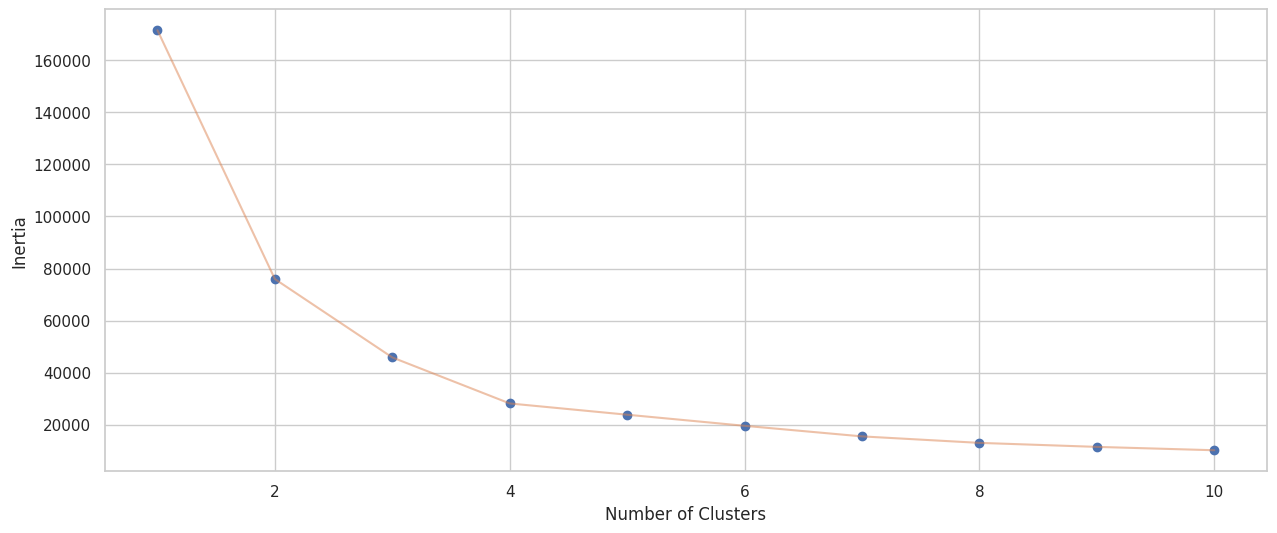

In [71]:
plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1 , 11) , inertia , 'o')
plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

In [72]:
kmean = (KMeans(n_clusters = 4 ,init='k-means++', n_init = 10 ,max_iter=300,
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
kmean.fit(X1)
labels1 = kmean.labels_
centroids1 = kmean.cluster_centers_

In [73]:
h = 0.02
x_min, x_max = X1[:, 0].min() - 1, X1[:, 0].max() + 1
y_min, y_max = X1[:, 1].min() - 1, X1[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = kmean.predict(np.c_[xx.ravel(), yy.ravel()])

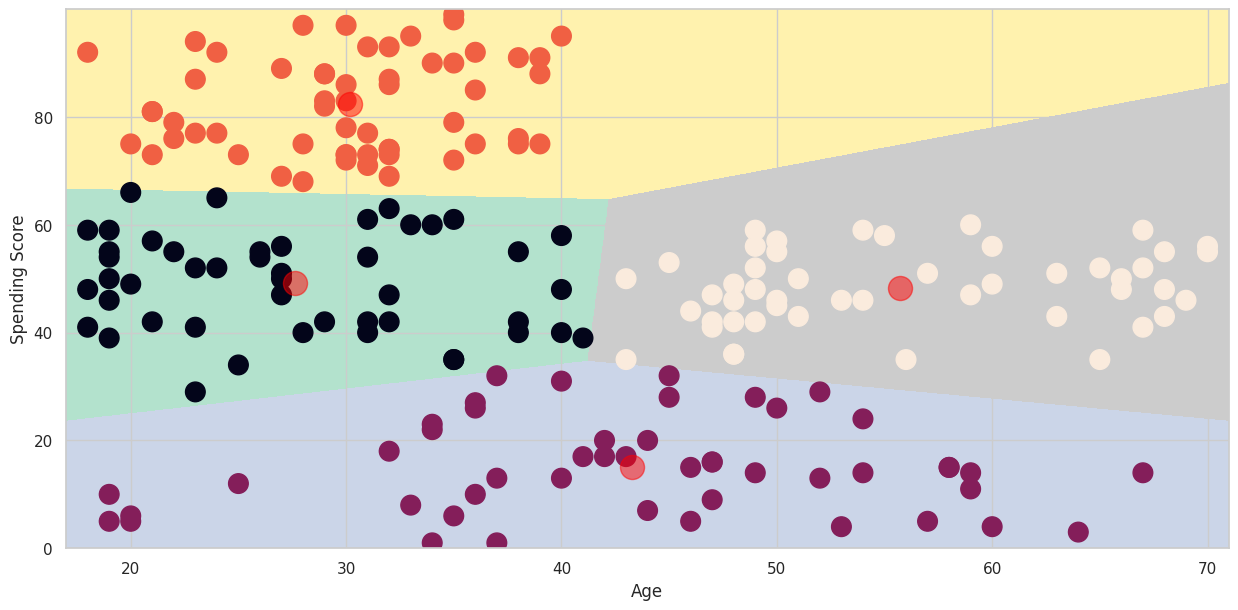

In [74]:
plt.figure(1 , figsize = (15 , 7) )
plt.clf()
Z = Z.reshape(xx.shape)
plt.imshow(Z , interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap = plt.cm.Pastel2, aspect = 'auto', origin='lower')

plt.scatter( x = 'Age' ,y = 'Spending Score' , data = df , c = labels1 ,
            s = 200 )
plt.scatter(x = centroids1[: , 0] , y =  centroids1[: , 1] , s = 300 , c = 'red' , alpha = 0.5)
plt.ylabel('Spending Score') , plt.xlabel('Age')
plt.show()

2. Segmentation using Annual Income and Spending Score

In [75]:
X2 = df[['Annual Income' , 'Spending Score']].iloc[: , :].values
inertia = []
for n in range(1 , 11):
    kmean = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300,
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
    kmean.fit(X2)
    inertia.append(kmean.inertia_)

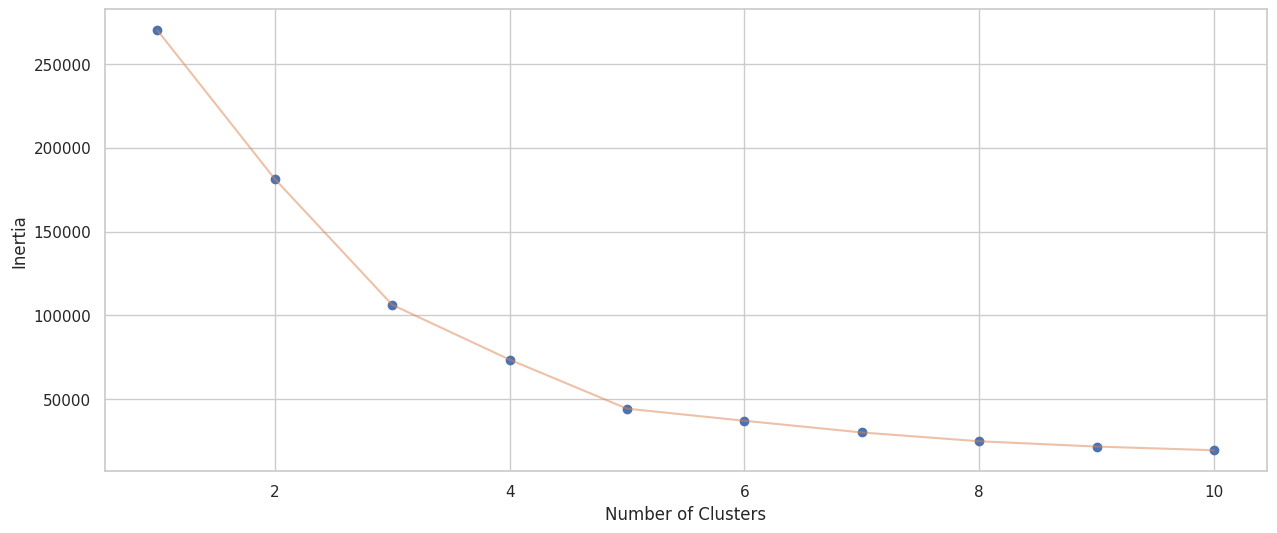

In [76]:
plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1 , 11) , inertia , 'o')
plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

In [77]:
kmean = (KMeans(n_clusters = 5 ,init='k-means++', n_init = 10 ,max_iter=300,
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
kmean.fit(X2)
labels2 = kmean.labels_
centroids2 = kmean.cluster_centers_

In [78]:
h = 0.02
x_min, x_max = X2[:, 0].min() - 1, X2[:, 0].max() + 1
y_min, y_max = X2[:, 1].min() - 1, X2[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z2 = kmean.predict(np.c_[xx.ravel(), yy.ravel()])

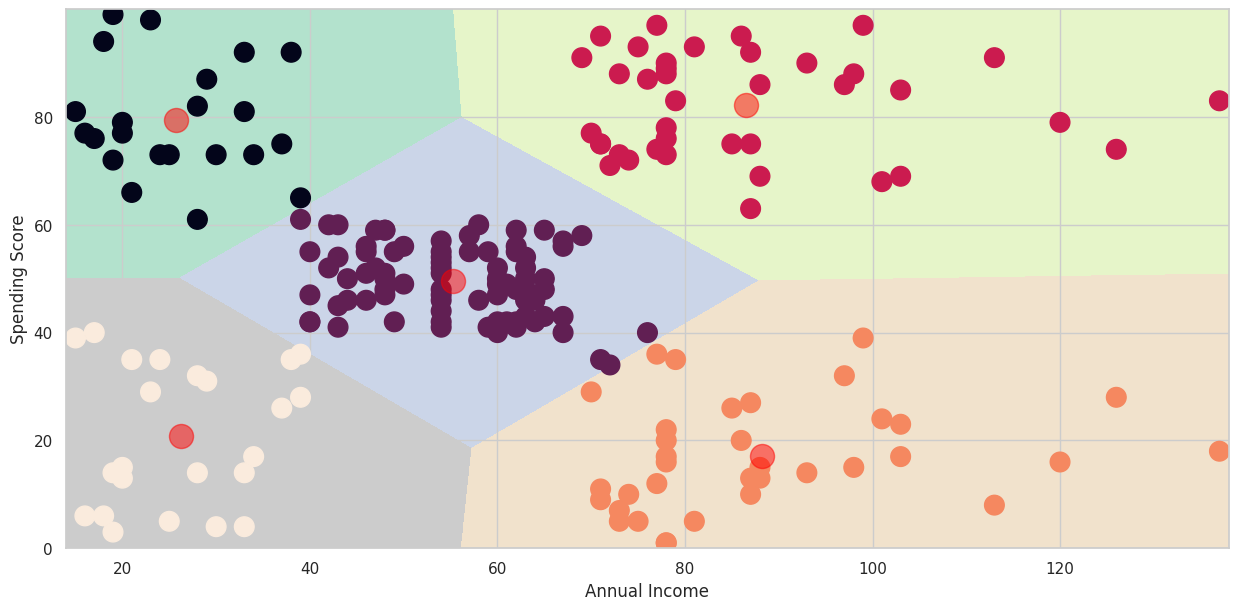

In [79]:
plt.figure(1 , figsize = (15 , 7) )
plt.clf()
Z2 = Z2.reshape(xx.shape)
plt.imshow(Z2 , interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap = plt.cm.Pastel2, aspect = 'auto', origin='lower')

plt.scatter( x = 'Annual Income' ,y = 'Spending Score' , data = df , c = labels2 ,
            s = 200 )
plt.scatter(x = centroids2[: , 0] , y =  centroids2[: , 1] , s = 300 , c = 'red' , alpha = 0.5)
plt.ylabel('Spending Score') , plt.xlabel('Annual Income')
plt.show()
